In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

Load the dataset

In [24]:
file_path = "diabetes_prediction_dataset.csv"
df = pd.read_csv(file_path)

Preprocessing
,Remove rows with missing values

In [25]:
df.dropna(inplace=True)


Encode categorical variables

In [26]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)


Normalize numerical features

In [27]:
scaler = StandardScaler()
num_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[num_features] = scaler.fit_transform(df[num_features])

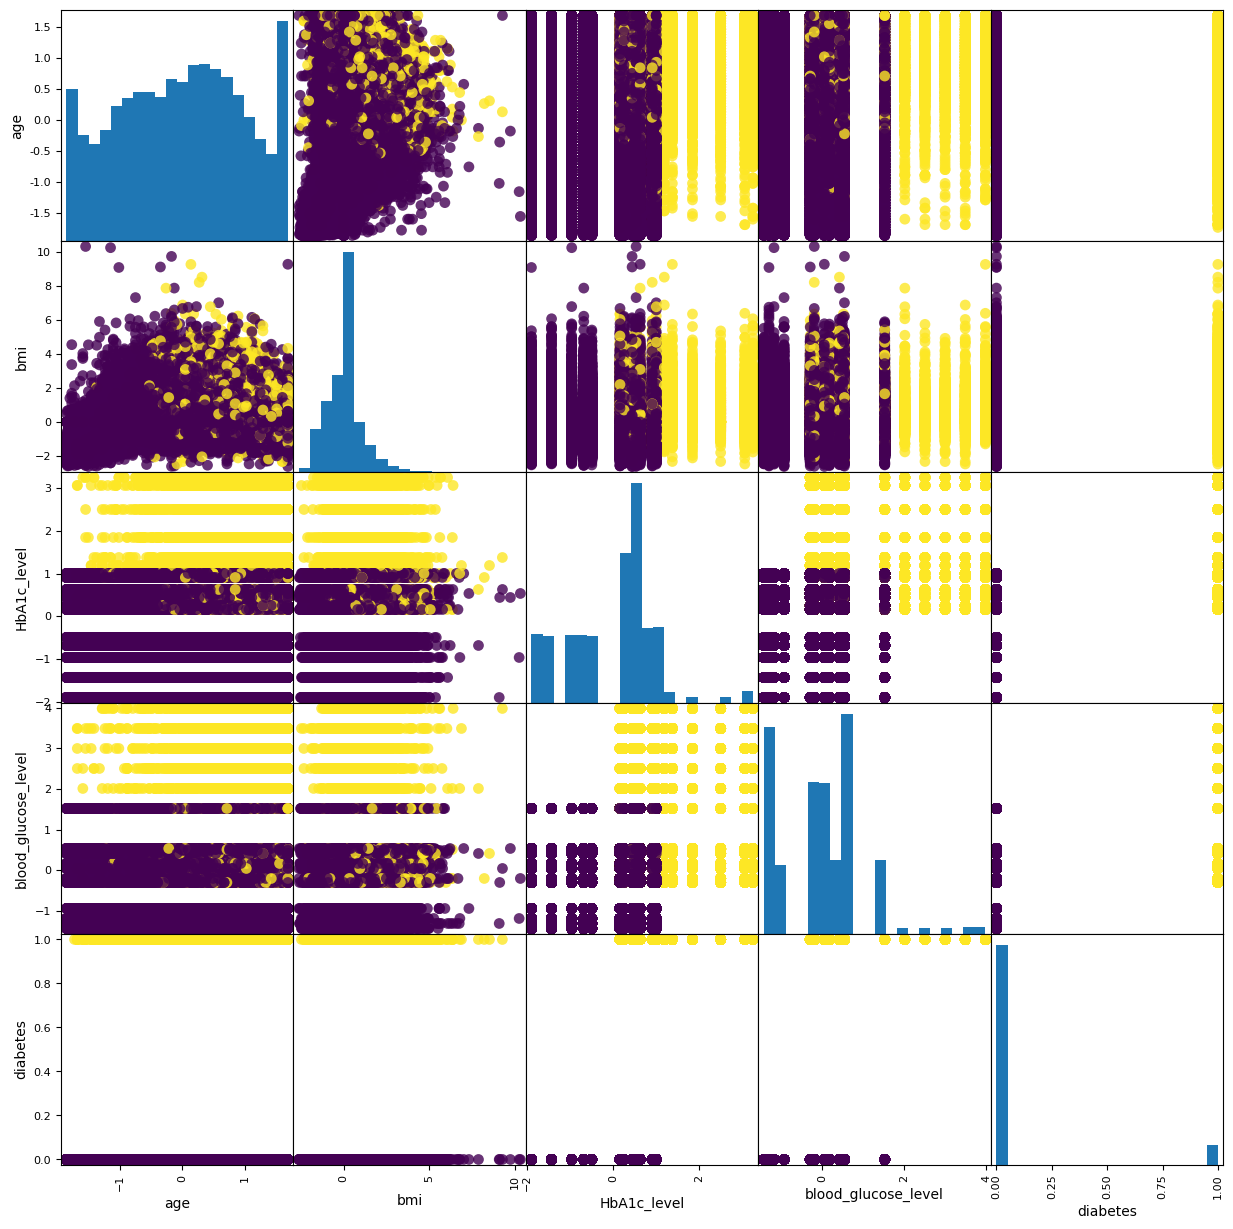

In [9]:
pd.plotting.scatter_matrix(df[features_subset], c=df['diabetes'], figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()



Note:Feature Engineering,
Perform feature selection if required,
Split the data into training and testing sets

In [20]:

X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Note:Train the Decision Tree model
,Use Entropy as the criterion

In [22]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Use Gini Index as the criterion

In [28]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Test the model

In [29]:
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

Performance Evaluation

In [30]:
print("Decision Tree - Entropy Criterion:")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Classification Report:")
print(classification_report(y_test, y_pred_entropy))

print("\nDecision Tree - Gini Index Criterion:")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Classification Report:")
print(classification_report(y_test, y_pred_gini))

Decision Tree - Entropy Criterion:
Accuracy: 0.95265
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.75      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000


Decision Tree - Gini Index Criterion:
Accuracy: 0.952
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



 Visualize the Decision Tree

In [31]:
import graphviz
dot_data = tree.export_graphviz(dt_entropy, out_file=None, feature_names=X.columns, class_names=['Negative', 'Positive'], filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


'decision_tree.pdf'